In [948]:
%matplotlib inline

import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

try:
    from mglearn.datasets import load_extended_boston
except:
    import sys
    !{sys.executable} -m pip install mglearn
finally:
    from mglearn.datasets import load_extended_boston
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso



In [766]:
boston = load_boston()

In [767]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [768]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [769]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [770]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [771]:
model = LinearRegression()

In [774]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [776]:
model.coef_[0]

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [759]:
model.intercept_

array([36.45948839])

In [780]:
model.coef_.reshape(-1)

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [781]:
for feature in zip(boston['feature_names'], model.coef_.reshape(-1)):
    print(feature)
print('intercept', model.intercept_)

('CRIM', -0.10801135783679539)
('ZN', 0.04642045836687953)
('INDUS', 0.020558626367068917)
('CHAS', 2.6867338193448442)
('NOX', -17.766611228299986)
('RM', 3.8098652068092282)
('AGE', 0.0006922246403431768)
('DIS', -1.47556684560025)
('RAD', 0.30604947898516427)
('TAX', -0.012334593916574021)
('PTRATIO', -0.9527472317072921)
('B', 0.00931168327379375)
('LSTAT', -0.5247583778554881)
intercept [36.45948839]


In [782]:
model.score(X_train, y_train)

0.7461235206791106

In [783]:
model.score(X_test, y_test)

0.7208121942952078

# Ridge Regression

In [788]:
X, y = load_extended_boston()

In [814]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [815]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [816]:
lm.score(X_train, y_train)

0.949024096661283

In [817]:
lm.score(X_test, y_test)

0.6158858584078784

In [826]:
lm.coef_

array([-4.90159819e+02, -4.00626206e+01, -1.25287218e+02, -8.91375244e+00,
       -8.06560621e+00,  3.28101194e+01,  4.65516841e+01, -6.27045004e+01,
        2.87358042e+01,  3.34139738e+01, -6.80132101e-01, -9.31619287e+00,
       -1.61133582e+01,  1.21301779e+01,  2.21565994e+03,  1.53054044e+03,
        1.24461620e+02, -1.27347248e+01,  4.24938302e+01, -3.54781532e+01,
        8.91645918e+00,  1.22299456e+03, -2.15366399e+03,  2.74716329e+02,
       -1.41233559e+00,  4.33324936e+01, -1.24082513e+01, -1.69004641e+01,
       -6.04317656e+00, -8.15771683e+01,  9.02286325e+00,  4.10360549e-01,
       -3.67270441e+00, -7.08564514e+00,  3.56048971e+01, -1.22564863e+01,
        5.79039071e+01, -1.52297806e+01,  3.98426090e+01,  5.64809836e+00,
        1.89043119e-01,  5.46913714e+01,  1.85814845e+01,  5.47572005e+01,
       -4.58182836e+01,  2.16098573e+01, -1.01744270e+01,  5.46020392e+01,
       -1.78903568e+01, -8.91375244e+00, -1.71954300e+01, -3.15047685e+01,
        2.78399230e+00,  

<BarContainer object of 104 artists>

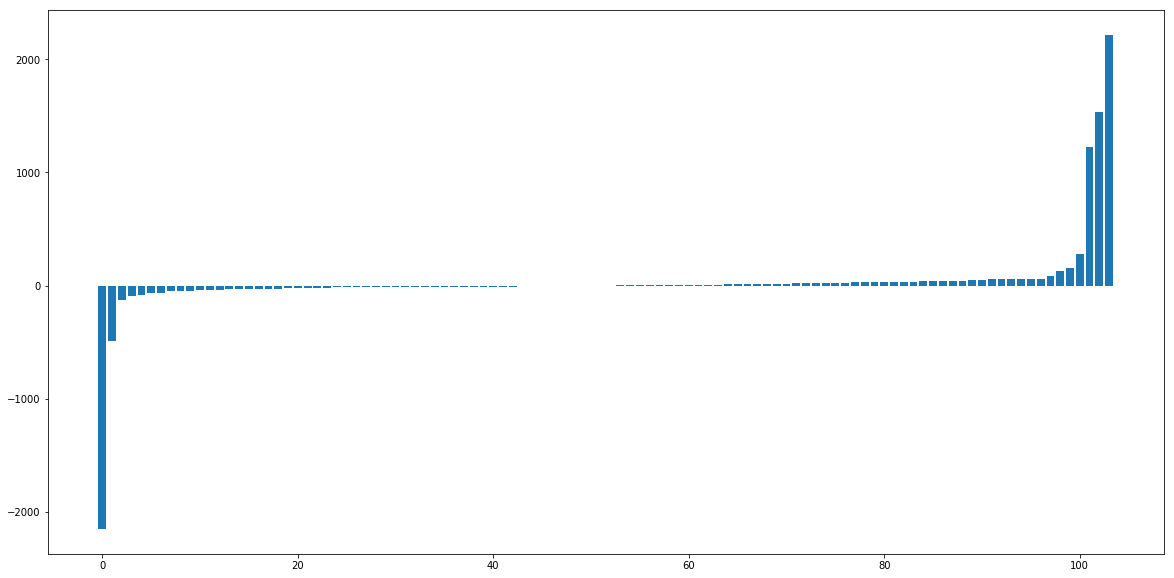

In [825]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(lm.coef_)), np.sort(lm.coef_, axis=0))

<BarContainer object of 104 artists>

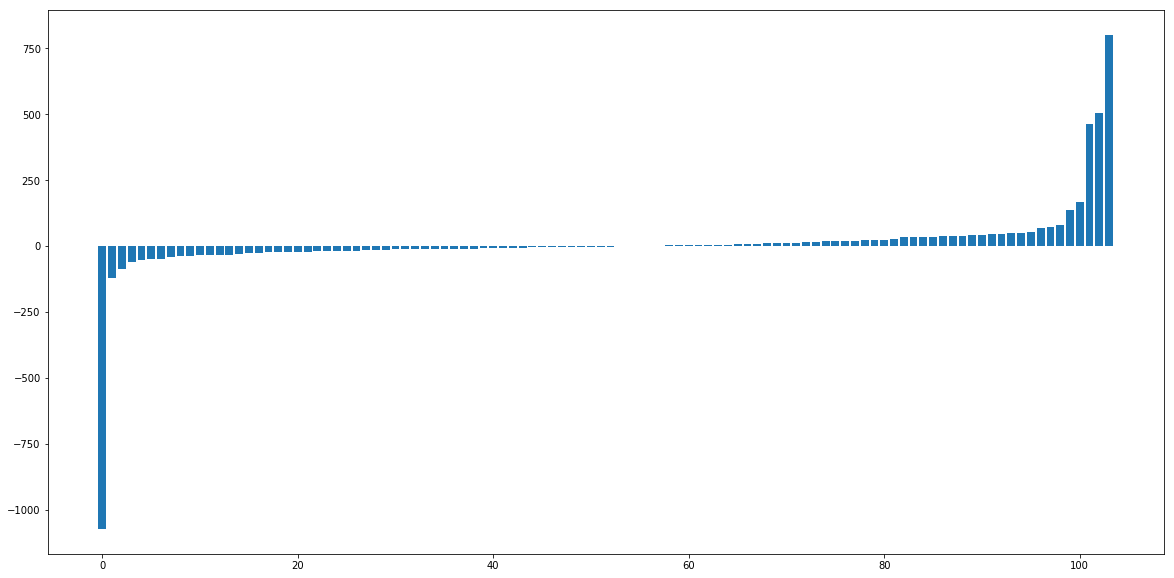

In [859]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(lm.coef_)), np.sort(lm.coef_, axis=0))


# Ridge

In [829]:
Rm = Ridge(alpha=0.1)
Rm.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [830]:
Rm.score(X_train, y_train)

0.9261926604874953

In [831]:
Rm.score(X_test, y_test)

0.7463824108919297

<BarContainer object of 104 artists>

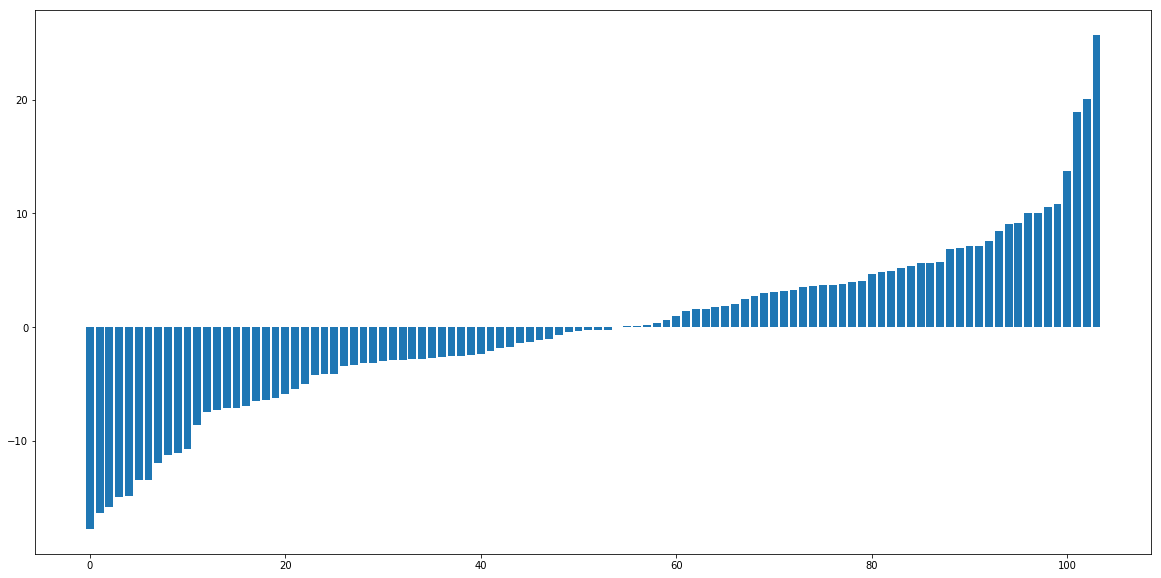

In [832]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(Rm.coef_)), np.sort(Rm.coef_, axis=0))

In [849]:
minimum_score = -100
minimum_alpha = 0
best_model = None
for i in list(range(0, 100, 1)):
    i = i/10
    
    rm = Ridge(alpha=i)
    rm.fit(X_train, y_train)
    
    
    train_score = rm.score(X_train, y_train)
    test_score = rm.score(X_test, y_test)
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = rm


alpha:0.0, train: 0.937985899627213, test: 0.766704574594288
alpha:0.1, train: 0.914767278961281, test: 0.8353849069622123
alpha:0.2, train: 0.9043473636982221, test: 0.8397297295685597
alpha:0.3, train: 0.8969094049739403, test: 0.8378498899769549
alpha:0.4, train: 0.8909682923429587, test: 0.8344525135942689
alpha:0.5, train: 0.8859509963170463, test: 0.8306708598837347
alpha:0.6, train: 0.881567955890946, test: 0.8268747348641007
alpha:0.7, train: 0.8776506962669234, test: 0.8231978280069029
alpha:0.8, train: 0.8740920130201625, test: 0.8196866783465233
alpha:0.9, train: 0.8708192630213556, test: 0.8163525398153051
alpha:1.0, train: 0.8677808502672848, test: 0.8131918788959596
alpha:1.1, train: 0.8649387520709575, test: 0.8101951508980275
alpha:1.2, train: 0.8622640995838693, test: 0.8073507378221588
alpha:1.3, train: 0.8597344238012653, test: 0.8046467445276884
alpha:1.4, train: 0.8573318653564599, test: 0.802071800392282
alpha:1.5, train: 0.855041969554776, test: 0.799615385539347

In [851]:
best_model

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

<BarContainer object of 104 artists>

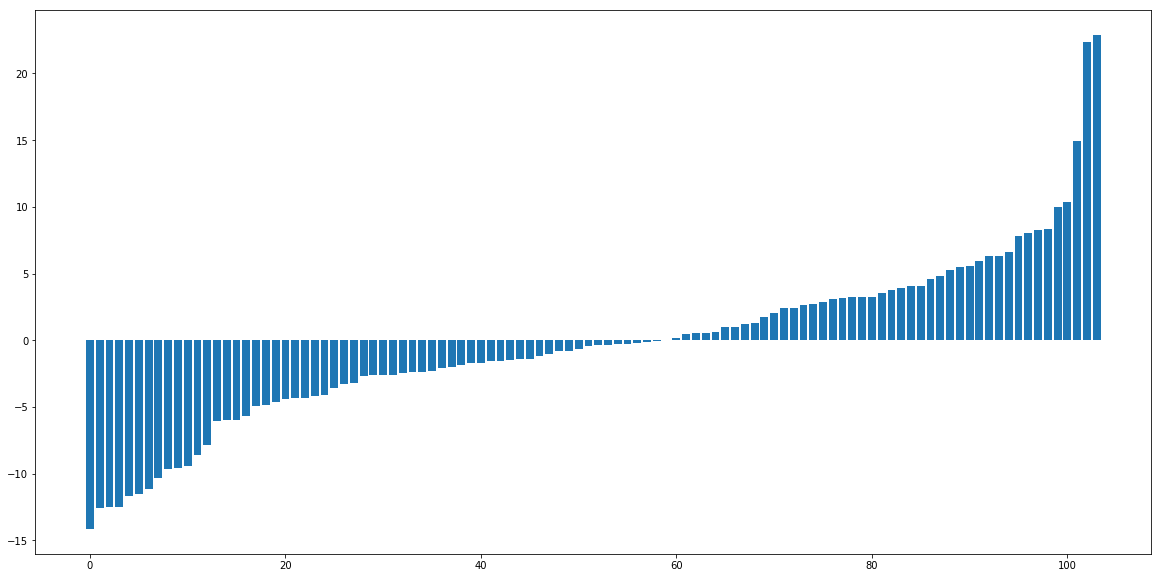

In [857]:
n = np.arange(len(best_model.coef_))

plt.figure(figsize=(20,10))
plt.bar(n, np.sort(best_model.coef_, axis=0))

In [865]:
rm = Ridge(alpha=10)
rm.fit(X_train, y_train)
    
train_score = rm.score(X_train, y_train)
test_score = rm.score(X_test, y_test)
print('alpha:{}, train: {}, test: {}'.format(10, train_score, test_score))


alpha:10, train: 0.7718293469197013, test: 0.7170540905667923


In [867]:
rm.coef_

array([-9.45523940e-01,  6.18376095e-01, -6.11613502e-01,  4.80623745e-01,
       -6.79755824e-01,  4.61433522e+00, -6.09349884e-02, -2.72932302e+00,
        1.16880420e+00, -1.17186768e+00, -2.17960517e+00,  1.04628298e+00,
       -4.31051118e+00, -7.14356541e-01,  4.14349985e-03, -6.11409999e-01,
        1.35857809e-01, -7.42553007e-01, -7.72741143e-01, -8.51253250e-01,
       -6.28721330e-02, -9.82283979e-01, -8.88150542e-01, -7.95039630e-01,
       -8.94733458e-01, -4.62164227e-01,  1.15190738e+00, -2.22717366e-01,
        7.32587869e-01,  2.59788390e-01,  2.01702494e+00,  4.37566854e-02,
       -3.19848189e-01,  9.72174334e-02, -5.08465079e-01, -1.06910669e-01,
        6.57969334e-01, -6.16291490e-01,  7.49939355e-01,  1.89425710e-01,
       -6.19304217e-01, -5.89080922e-01,  2.75667473e-01, -1.10956125e+00,
        3.83462867e-01,  5.27863641e-01, -5.48686902e-01,  7.88935099e-02,
       -1.41734874e+00,  4.80623745e-01, -6.05284037e-01,  6.29339422e-01,
        1.69493274e-01,  

### cross validation with Ridge

In [877]:
minimum_score = -100
minimum_alpha = 0
best_model = None

cross_mean = -100
cross_alpha = 0
cross_best = None

for i in list(range(0, 100, 1)):
    i = i/10
    
    rm = Ridge(alpha=i)
    rm.fit(X_train, y_train)
    
    
    train_score = rm.score(X_train, y_train)
    test_score = rm.score(X_test, y_test)
    
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = rm
    
    # cross validation scores
    cross_scores = cross_val_score(rm, X, y, cv=5)
    _cross_mean, _corss_std = cross_scores.mean(), cross_scores.std()
        
    if cross_mean < _cross_mean:
        cross_mean = _cross_mean
        cross_alpha = i
        cross_best = rm



alpha:0.0, train: 0.937985899627213, test: 0.766704574594288
alpha:0.1, train: 0.914767278961281, test: 0.8353849069622123
alpha:0.2, train: 0.9043473636982221, test: 0.8397297295685597
alpha:0.3, train: 0.8969094049739403, test: 0.8378498899769549
alpha:0.4, train: 0.8909682923429587, test: 0.8344525135942689
alpha:0.5, train: 0.8859509963170463, test: 0.8306708598837347
alpha:0.6, train: 0.881567955890946, test: 0.8268747348641007
alpha:0.7, train: 0.8776506962669234, test: 0.8231978280069029
alpha:0.8, train: 0.8740920130201625, test: 0.8196866783465233
alpha:0.9, train: 0.8708192630213556, test: 0.8163525398153051
alpha:1.0, train: 0.8677808502672848, test: 0.8131918788959596
alpha:1.1, train: 0.8649387520709575, test: 0.8101951508980275
alpha:1.2, train: 0.8622640995838693, test: 0.8073507378221588
alpha:1.3, train: 0.8597344238012653, test: 0.8046467445276884
alpha:1.4, train: 0.8573318653564599, test: 0.802071800392282
alpha:1.5, train: 0.855041969554776, test: 0.799615385539347

/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.41362e-19): result may not be accurate.
  overwrite_a=True).T



alpha:1.7, train: 0.8507546012120059, test: 0.7950207890734633
alpha:1.8, train: 0.8487388553986077, test: 0.7928662064176129
alpha:1.9, train: 0.8467984756843192, test: 0.7907972094952946
alpha:2.0, train: 0.8449273098875218, test: 0.7888075380755076
alpha:2.1, train: 0.8431200082698338, test: 0.7868915616250449
alpha:2.2, train: 0.8413718814204235, test: 0.7850442058596511
alpha:2.3, train: 0.8396787888057385, test: 0.7832608870493494
alpha:2.4, train: 0.8380370503728434, test: 0.7815374540646044
alpha:2.5, train: 0.836443375703261, test: 0.7798701376522046
alpha:2.6, train: 0.8348948066826546, test: 0.7782555062271146
alpha:2.7, train: 0.8333886706902557, test: 0.7766904274174365
alpha:2.8, train: 0.8319225420569563, test: 0.7751720346270764
alpha:2.9, train: 0.8304942100823545, test: 0.7736976979430086
alpha:3.0, train: 0.8291016522991703, test: 0.7722649987888801
alpha:3.1, train: 0.827743011969446, test: 0.7708717078025059
alpha:3.2, train: 0.8264165790192902, test: 0.7695157654

In [882]:
cross_best

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [880]:
cross_best.score(X_test, y_test)


0.8131918788959596

In [881]:
cross_best.score(X, y)

0.8559341608869707

<BarContainer object of 104 artists>

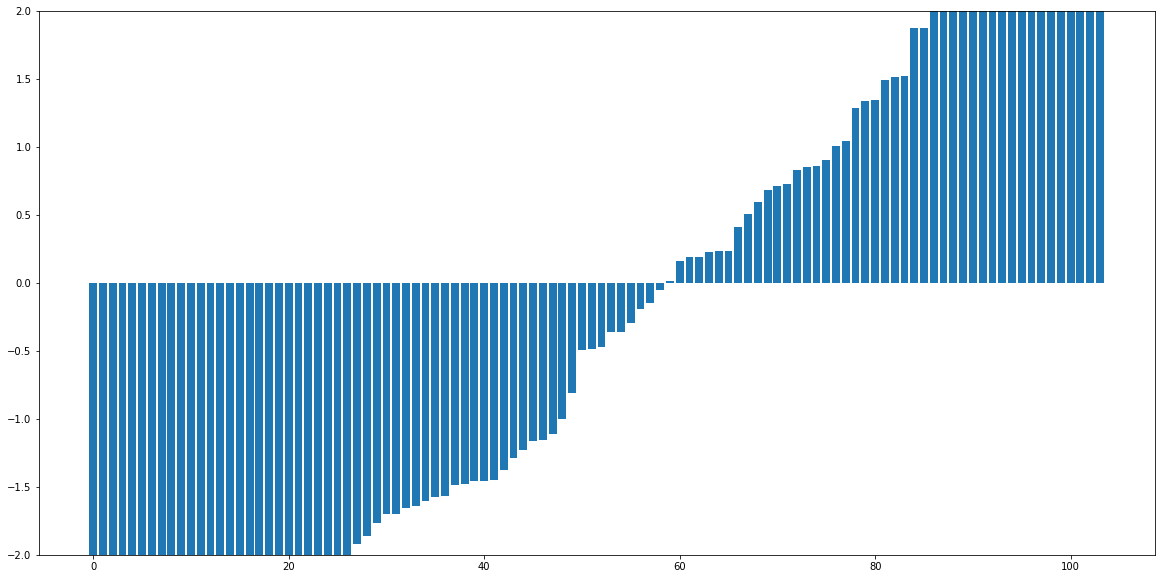

In [886]:
n = np.arange(len(cross_best.coef_))

plt.figure(figsize=(20,10))
plt.ylim(-2,2)
plt.bar(n, np.sort(cross_best.coef_, axis=0))

In [943]:
# 만약 알파값이 늘어나면??
rm = Ridge(alpha=0)
rm1 = Ridge(alpha=0.1)
rm2 = Ridge(alpha=0.5)
rm3 = Ridge(alpha=10)
rm4 = Ridge(alpha=20)

rm4 = Ridge(alpha=40)
rm5 = Ridge(alpha=80)

rm.fit(X_train, y_train)
rm1.fit(X_train, y_train)
rm2.fit(X_train, y_train)
rm3.fit(X_train, y_train)
rm4.fit(X_train, y_train)
rm5.fit(X_train, y_train)

Ridge(alpha=80, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

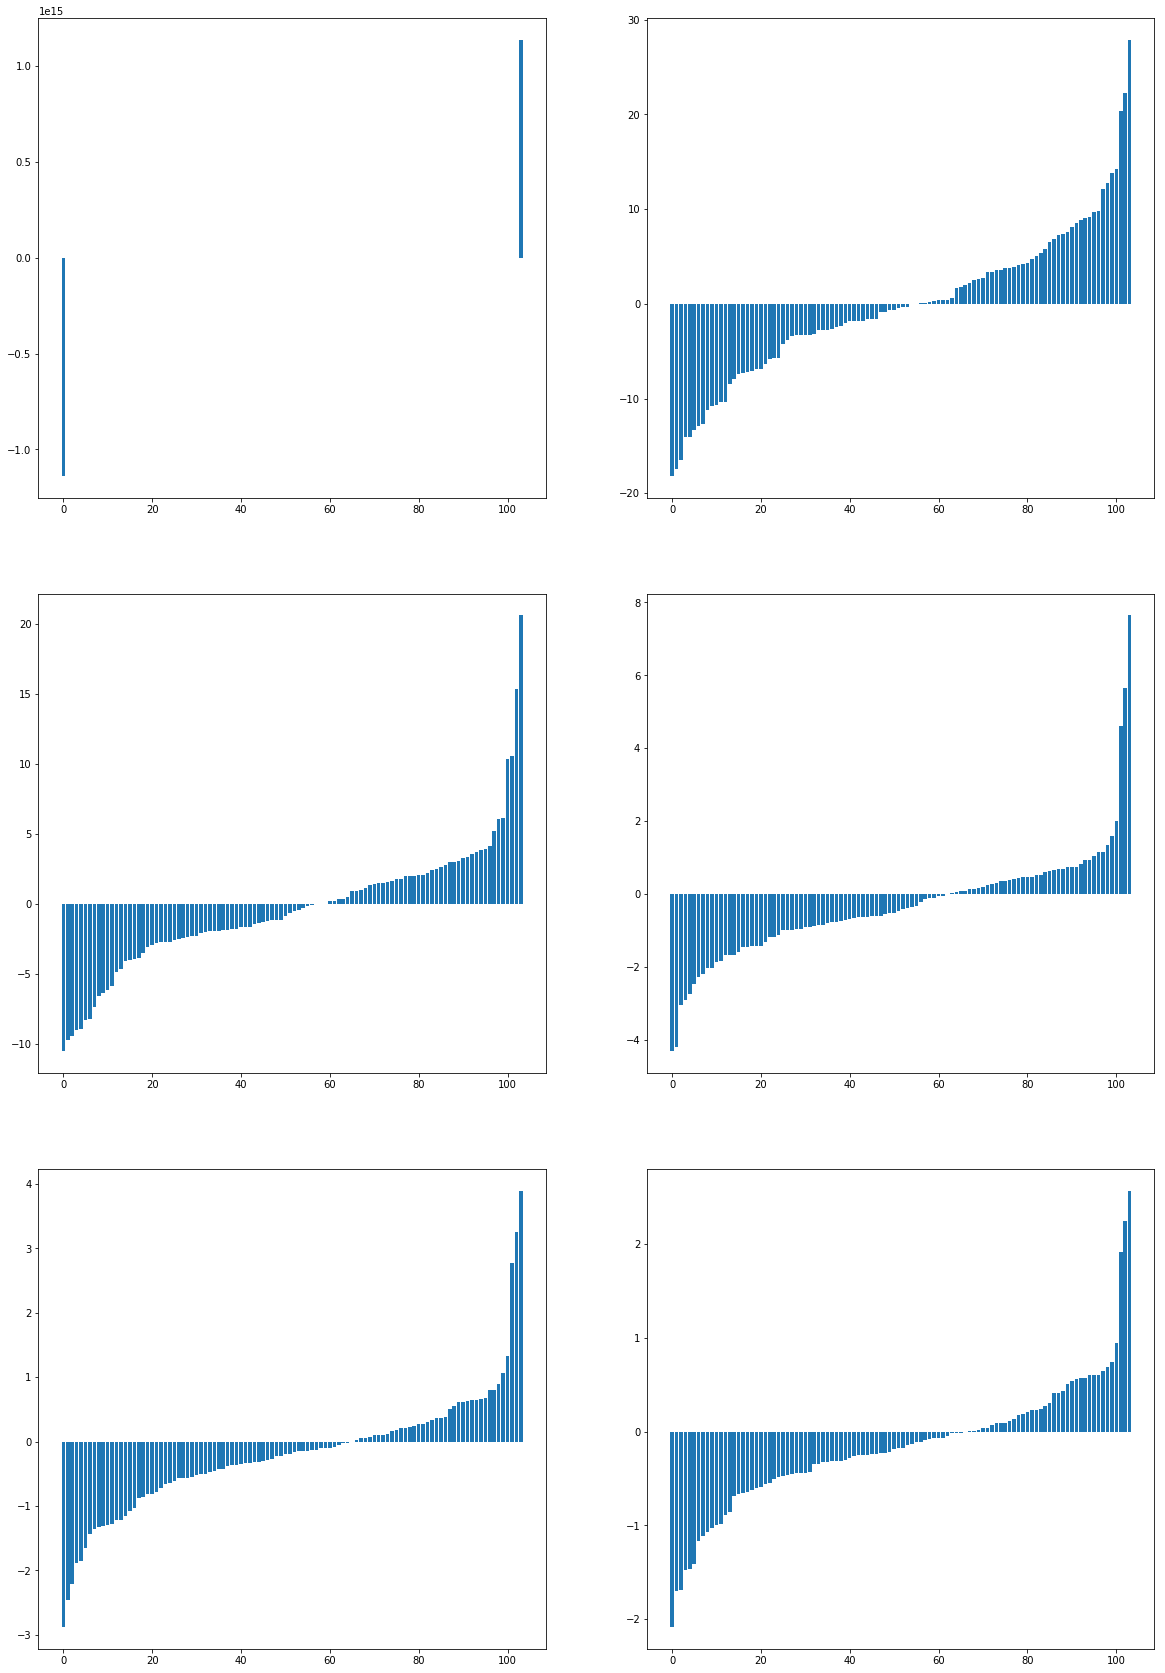

In [944]:
n = np.arange(len(rm.coef_))

plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
plt.bar(n, np.sort(rm.coef_, axis=0))

plt.subplot(3,2,2)
plt.bar(n, np.sort(rm1.coef_, axis=0))

plt.subplot(3,2,3)
plt.bar(n, np.sort(rm2.coef_, axis=0))

plt.subplot(3,2,4)
plt.bar(n, np.sort(rm3.coef_, axis=0))

plt.subplot(3,2,5)
plt.bar(n, np.sort(rm4.coef_, axis=0))

plt.subplot(3,2,6)
plt.bar(n, np.sort(rm5.coef_, axis=0))
plt.show()

[-1.20749107e+02 -1.64138664e+01 -8.72351634e+01  1.13755799e+15
  1.39174604e+01  6.67066148e+01  4.39237101e+01 -2.70647217e+01
  1.00697987e+01  3.68315727e+01  2.30973764e+00  4.04255682e+01
  2.38833445e+01  1.98294236e+01  3.15798140e+02  8.93503844e+02
  1.64942284e+02 -5.59653980e+01  3.03638591e+01 -3.58519000e+01
 -2.89937352e+01  5.60229292e+02 -1.24811933e+03  1.49494363e+02
 -1.17022294e+01  7.04693451e+01 -3.93167147e+00 -8.68973269e+00
 -4.81423854e+00 -5.04012182e+01  7.97075202e+00  5.74038059e+00
 -1.26671336e+01 -1.13609590e+01  3.61227816e+01  3.95924284e-01
  2.24280866e+01 -3.43147328e+01  3.46222176e+01 -1.13220033e+00
  6.25640059e+00  4.25872889e+01  1.25017991e+01  4.88600320e+01
 -9.90547674e+00  1.18900310e+01  5.95835026e+00  1.76647847e+01
 -1.90994247e+01 -1.13755799e+15 -6.72219507e+00 -3.22139764e+01
  3.93843878e+00  1.71373913e+01 -2.80867558e+00  2.44173668e+00
 -1.00731895e+01  4.39818133e+01 -1.24014399e+01 -5.69159172e+00
 -4.79704406e-01 -1.50838

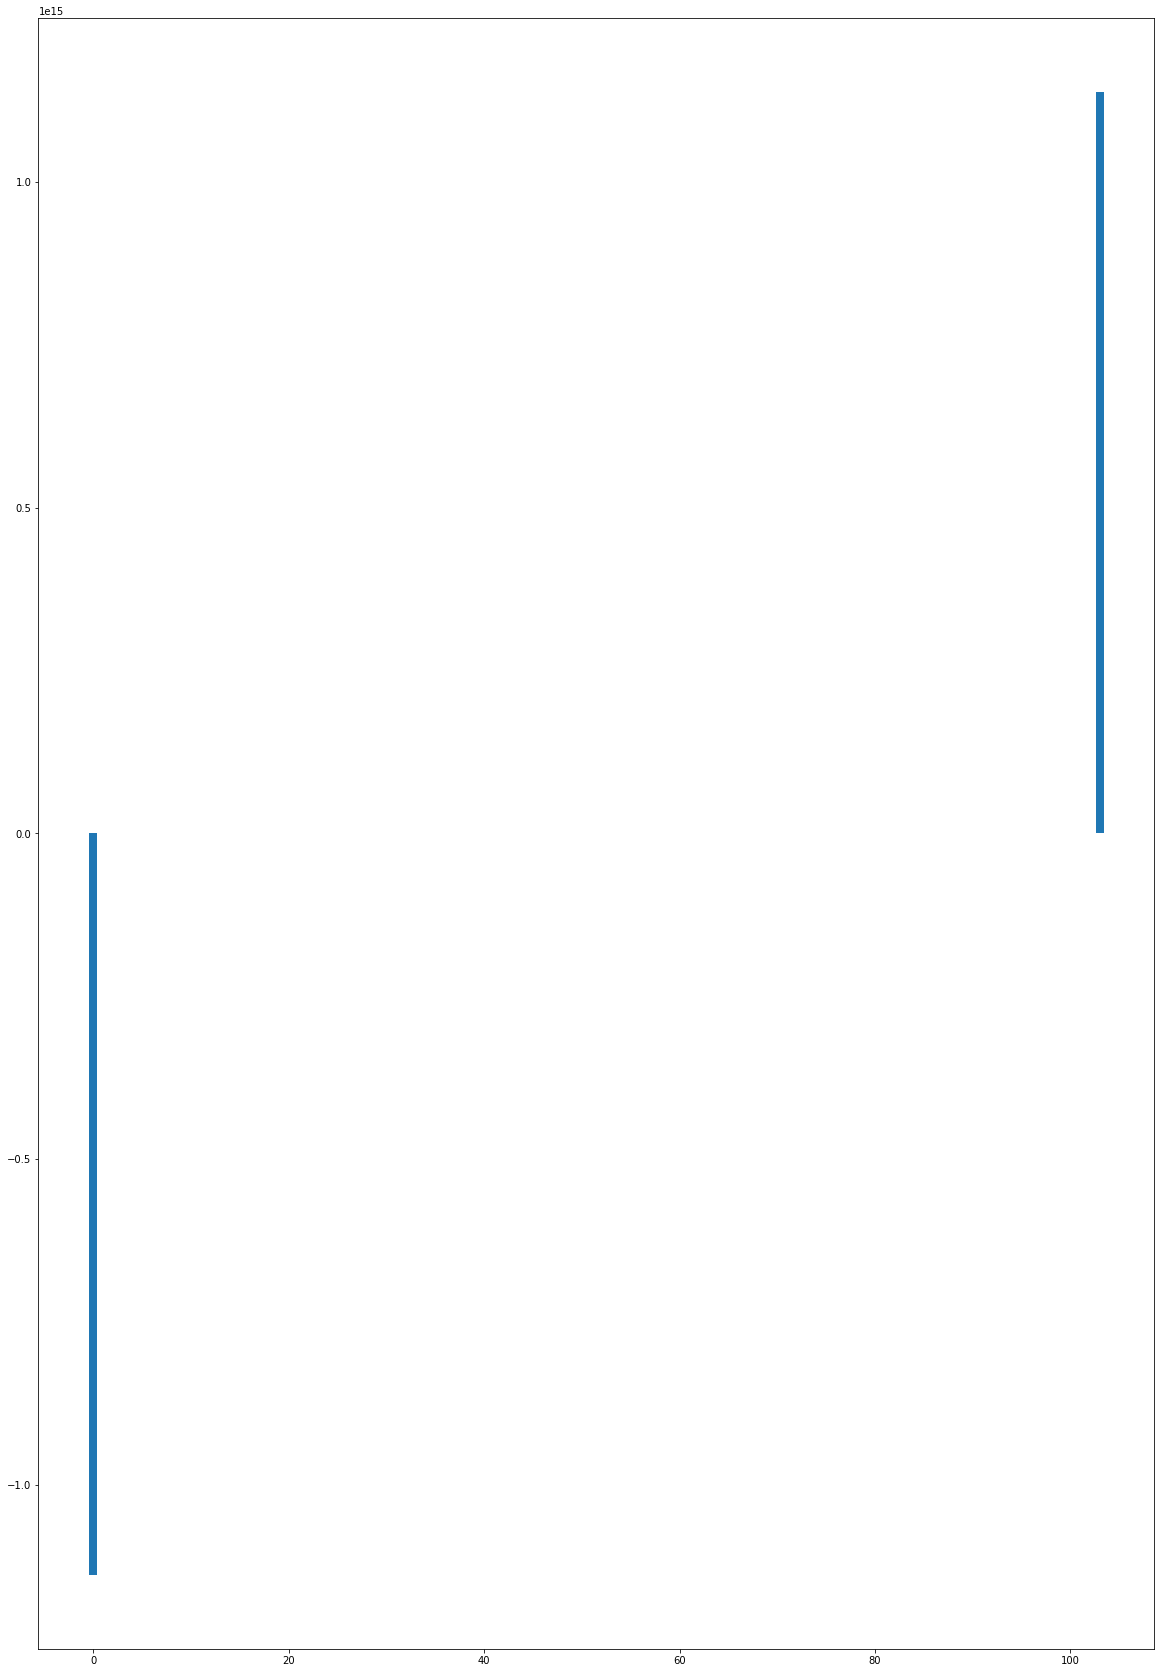

In [947]:
plt.figure(figsize=(20,30))
plt.bar(n, np.sort(rm.coef_, axis=0))

print(rm.coef_)

# Lasso

In [915]:
rm = Lasso(alpha=.1)
rm.fit(X_train, y_train)
    
train_score = rm.score(X_train, y_train)
test_score = rm.score(X_test, y_test)
print('alpha:{}, train: {}, test: {}'.format(0.1, train_score, test_score))


alpha:0.1, train: 0.7545158635323794, test: 0.6801312839985496


In [916]:
minimum_score = -100
minimum_alpha = 0
best_model = None
for i in list(range(0, 100, 1)):
    i = i/10
    
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train, y_train)
    
    
    train_score = lasso_model.score(X_train, y_train)
    test_score = lasso_model.score(X_test, y_test)
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = lasso_model


/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:0.0, train: 0.9331695618775461, test: 0.761435378957237
alpha:0.1, train: 0.7545158635323794, test: 0.6801312839985496
alpha:0.2, train: 0.7186573650691541, test: 0.6507092785446373
alpha:0.3, train: 0.6865271725289662, test: 0.6288371840799425
alpha:0.4, train: 0.643478007471336, test: 0.5938126227413292
alpha:0.5, train: 0.5887532053408021, test: 0.5463388279746038
alpha:0.6, train: 0.5218717777218747, test: 0.4863003070068751
alpha:0.7, train: 0.4428506239182929, test: 0.41372977883145035
alpha:0.8, train: 0.3680297977516257, test: 0.3400948370742255
alpha:0.9, train: 0.2939752922747717, test: 0.26522400319636974
alpha:1.0, train: 0.22840119441422002, test: 0.19824695618287325
alpha:1.1, train: 0.15592465376505482, test: 0.12302764170315605
alpha:1.2, train: 0.09505590734239333, test: 0.06398171123866203
alpha:1.3, train: 0.05420999312440944, test: 0.03289963973286192
alpha:1.4, train: 0.027494728289506387, test: 0.011495534507835248
alpha:1.5, train: 0.008085434928236102, tes

In [917]:
best_model

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### cross validation with Lasso

In [920]:
minimum_score = -100
minimum_alpha = 0
best_model = None

cross_mean = -100
cross_alpha = 0
cross_best = None

for i in list(range(0, 100, 1)):
    i = i/10
    
    lm = Lasso(alpha=i)
    lm.fit(X_train, y_train)
    
    
    train_score = lm.score(X_train, y_train)
    test_score = lm.score(X_test, y_test)
    
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = lm
    
    # cross validation scores
    cross_scores = cross_val_score(rm, X, y, cv=5)
    _cross_mean, _corss_std = cross_scores.mean(), cross_scores.std()
        
    if cross_mean < _cross_mean:
        cross_mean = _cross_mean
        cross_alpha = i
        cross_best = lm



/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:0.0, train: 0.9331695618775461, test: 0.761435378957237
alpha:0.1, train: 0.7545158635323794, test: 0.6801312839985496
alpha:0.2, train: 0.7186573650691541, test: 0.6507092785446373
alpha:0.3, train: 0.6865271725289662, test: 0.6288371840799425
alpha:0.4, train: 0.643478007471336, test: 0.5938126227413292
alpha:0.5, train: 0.5887532053408021, test: 0.5463388279746038
alpha:0.6, train: 0.5218717777218747, test: 0.4863003070068751
alpha:0.7, train: 0.4428506239182929, test: 0.41372977883145035
alpha:0.8, train: 0.3680297977516257, test: 0.3400948370742255
alpha:0.9, train: 0.2939752922747717, test: 0.26522400319636974
alpha:1.0, train: 0.22840119441422002, test: 0.19824695618287325
alpha:1.1, train: 0.15592465376505482, test: 0.12302764170315605
alpha:1.2, train: 0.09505590734239333, test: 0.06398171123866203
alpha:1.3, train: 0.05420999312440944, test: 0.03289963973286192
alpha:1.4, train: 0.027494728289506387, test: 0.011495534507835248
alpha:1.5, train: 0.008085434928236102, tes

alpha:16.2, train: 0.0, test: -0.012439932990852887
alpha:16.3, train: 0.0, test: -0.012439932990852887
alpha:16.4, train: 0.0, test: -0.012439932990852887
alpha:16.5, train: 0.0, test: -0.012439932990852887
alpha:16.6, train: 0.0, test: -0.012439932990852887
alpha:16.7, train: 0.0, test: -0.012439932990852887
alpha:16.8, train: 0.0, test: -0.012439932990852887
alpha:16.9, train: 0.0, test: -0.012439932990852887
alpha:17.0, train: 0.0, test: -0.012439932990852887
alpha:17.1, train: 0.0, test: -0.012439932990852887
alpha:17.2, train: 0.0, test: -0.012439932990852887
alpha:17.3, train: 0.0, test: -0.012439932990852887
alpha:17.4, train: 0.0, test: -0.012439932990852887
alpha:17.5, train: 0.0, test: -0.012439932990852887
alpha:17.6, train: 0.0, test: -0.012439932990852887
alpha:17.7, train: 0.0, test: -0.012439932990852887
alpha:17.8, train: 0.0, test: -0.012439932990852887
alpha:17.9, train: 0.0, test: -0.012439932990852887
alpha:18.0, train: 0.0, test: -0.012439932990852887
alpha:18.1, 

alpha:32.0, train: 0.0, test: -0.012439932990852887
alpha:32.1, train: 0.0, test: -0.012439932990852887
alpha:32.2, train: 0.0, test: -0.012439932990852887
alpha:32.3, train: 0.0, test: -0.012439932990852887
alpha:32.4, train: 0.0, test: -0.012439932990852887
alpha:32.5, train: 0.0, test: -0.012439932990852887
alpha:32.6, train: 0.0, test: -0.012439932990852887
alpha:32.7, train: 0.0, test: -0.012439932990852887
alpha:32.8, train: 0.0, test: -0.012439932990852887
alpha:32.9, train: 0.0, test: -0.012439932990852887
alpha:33.0, train: 0.0, test: -0.012439932990852887
alpha:33.1, train: 0.0, test: -0.012439932990852887
alpha:33.2, train: 0.0, test: -0.012439932990852887
alpha:33.3, train: 0.0, test: -0.012439932990852887
alpha:33.4, train: 0.0, test: -0.012439932990852887
alpha:33.5, train: 0.0, test: -0.012439932990852887
alpha:33.6, train: 0.0, test: -0.012439932990852887
alpha:33.7, train: 0.0, test: -0.012439932990852887
alpha:33.8, train: 0.0, test: -0.012439932990852887
alpha:33.9, 

alpha:48.7, train: 0.0, test: -0.012439932990852887
alpha:48.8, train: 0.0, test: -0.012439932990852887
alpha:48.9, train: 0.0, test: -0.012439932990852887
alpha:49.0, train: 0.0, test: -0.012439932990852887
alpha:49.1, train: 0.0, test: -0.012439932990852887
alpha:49.2, train: 0.0, test: -0.012439932990852887
alpha:49.3, train: 0.0, test: -0.012439932990852887
alpha:49.4, train: 0.0, test: -0.012439932990852887
alpha:49.5, train: 0.0, test: -0.012439932990852887
alpha:49.6, train: 0.0, test: -0.012439932990852887
alpha:49.7, train: 0.0, test: -0.012439932990852887
alpha:49.8, train: 0.0, test: -0.012439932990852887
alpha:49.9, train: 0.0, test: -0.012439932990852887
alpha:50.0, train: 0.0, test: -0.012439932990852887
alpha:50.1, train: 0.0, test: -0.012439932990852887
alpha:50.2, train: 0.0, test: -0.012439932990852887
alpha:50.3, train: 0.0, test: -0.012439932990852887
alpha:50.4, train: 0.0, test: -0.012439932990852887
alpha:50.5, train: 0.0, test: -0.012439932990852887
alpha:50.6, 

alpha:65.4, train: 0.0, test: -0.012439932990852887
alpha:65.5, train: 0.0, test: -0.012439932990852887
alpha:65.6, train: 0.0, test: -0.012439932990852887
alpha:65.7, train: 0.0, test: -0.012439932990852887
alpha:65.8, train: 0.0, test: -0.012439932990852887
alpha:65.9, train: 0.0, test: -0.012439932990852887
alpha:66.0, train: 0.0, test: -0.012439932990852887
alpha:66.1, train: 0.0, test: -0.012439932990852887
alpha:66.2, train: 0.0, test: -0.012439932990852887
alpha:66.3, train: 0.0, test: -0.012439932990852887
alpha:66.4, train: 0.0, test: -0.012439932990852887
alpha:66.5, train: 0.0, test: -0.012439932990852887
alpha:66.6, train: 0.0, test: -0.012439932990852887
alpha:66.7, train: 0.0, test: -0.012439932990852887
alpha:66.8, train: 0.0, test: -0.012439932990852887
alpha:66.9, train: 0.0, test: -0.012439932990852887
alpha:67.0, train: 0.0, test: -0.012439932990852887
alpha:67.1, train: 0.0, test: -0.012439932990852887
alpha:67.2, train: 0.0, test: -0.012439932990852887
alpha:67.3, 

alpha:82.0, train: 0.0, test: -0.012439932990852887
alpha:82.1, train: 0.0, test: -0.012439932990852887
alpha:82.2, train: 0.0, test: -0.012439932990852887
alpha:82.3, train: 0.0, test: -0.012439932990852887
alpha:82.4, train: 0.0, test: -0.012439932990852887
alpha:82.5, train: 0.0, test: -0.012439932990852887
alpha:82.6, train: 0.0, test: -0.012439932990852887
alpha:82.7, train: 0.0, test: -0.012439932990852887
alpha:82.8, train: 0.0, test: -0.012439932990852887
alpha:82.9, train: 0.0, test: -0.012439932990852887
alpha:83.0, train: 0.0, test: -0.012439932990852887
alpha:83.1, train: 0.0, test: -0.012439932990852887
alpha:83.2, train: 0.0, test: -0.012439932990852887
alpha:83.3, train: 0.0, test: -0.012439932990852887
alpha:83.4, train: 0.0, test: -0.012439932990852887
alpha:83.5, train: 0.0, test: -0.012439932990852887
alpha:83.6, train: 0.0, test: -0.012439932990852887
alpha:83.7, train: 0.0, test: -0.012439932990852887
alpha:83.8, train: 0.0, test: -0.012439932990852887
alpha:83.9, 

alpha:98.6, train: 0.0, test: -0.012439932990852887
alpha:98.7, train: 0.0, test: -0.012439932990852887
alpha:98.8, train: 0.0, test: -0.012439932990852887
alpha:98.9, train: 0.0, test: -0.012439932990852887
alpha:99.0, train: 0.0, test: -0.012439932990852887
alpha:99.1, train: 0.0, test: -0.012439932990852887
alpha:99.2, train: 0.0, test: -0.012439932990852887
alpha:99.3, train: 0.0, test: -0.012439932990852887
alpha:99.4, train: 0.0, test: -0.012439932990852887
alpha:99.5, train: 0.0, test: -0.012439932990852887
alpha:99.6, train: 0.0, test: -0.012439932990852887
alpha:99.7, train: 0.0, test: -0.012439932990852887
alpha:99.8, train: 0.0, test: -0.012439932990852887
alpha:99.9, train: 0.0, test: -0.012439932990852887


In [922]:
cross_best.score(X_test, y_test)

0.761435378957237

<BarContainer object of 104 artists>

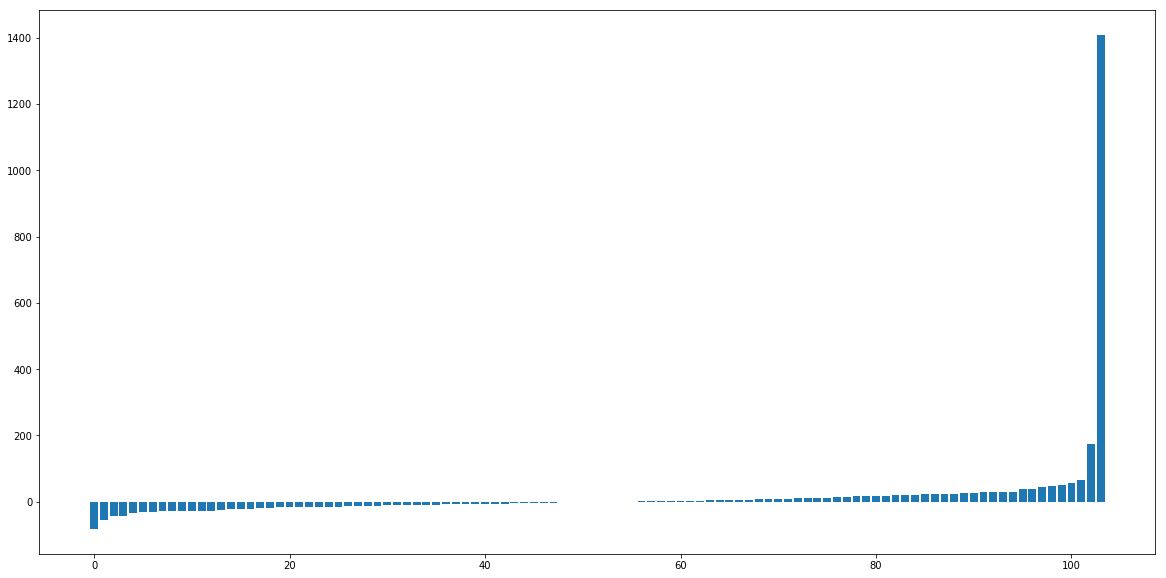

In [924]:
cross_best.score(X_test, y_test)
n = np.arange(len(cross_best.coef_))

plt.figure(figsize=(20,10))
plt.bar(n, np.sort(cross_best.coef_, axis=0))

In [931]:
# 만약 알파값이 늘어나면??
lm = Lasso(alpha=0)
lm1 = Lasso(alpha=.1)
lm2 = Lasso(alpha=.5)
lm3 = Lasso(alpha=1)
lm4 = Lasso(alpha=2)
lm5 = Lasso(alpha=4)
lm6 = Lasso(alpha=8)


lm.fit(X_train, y_train)
lm1.fit(X_train, y_train)
lm2.fit(X_train, y_train)
lm3.fit(X_train, y_train)
lm4.fit(X_train, y_train)
lm5.fit(X_train, y_train)
lm6.fit(X_train, y_train)


/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/Mac/anaconda3/envs/lecture_env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=8, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

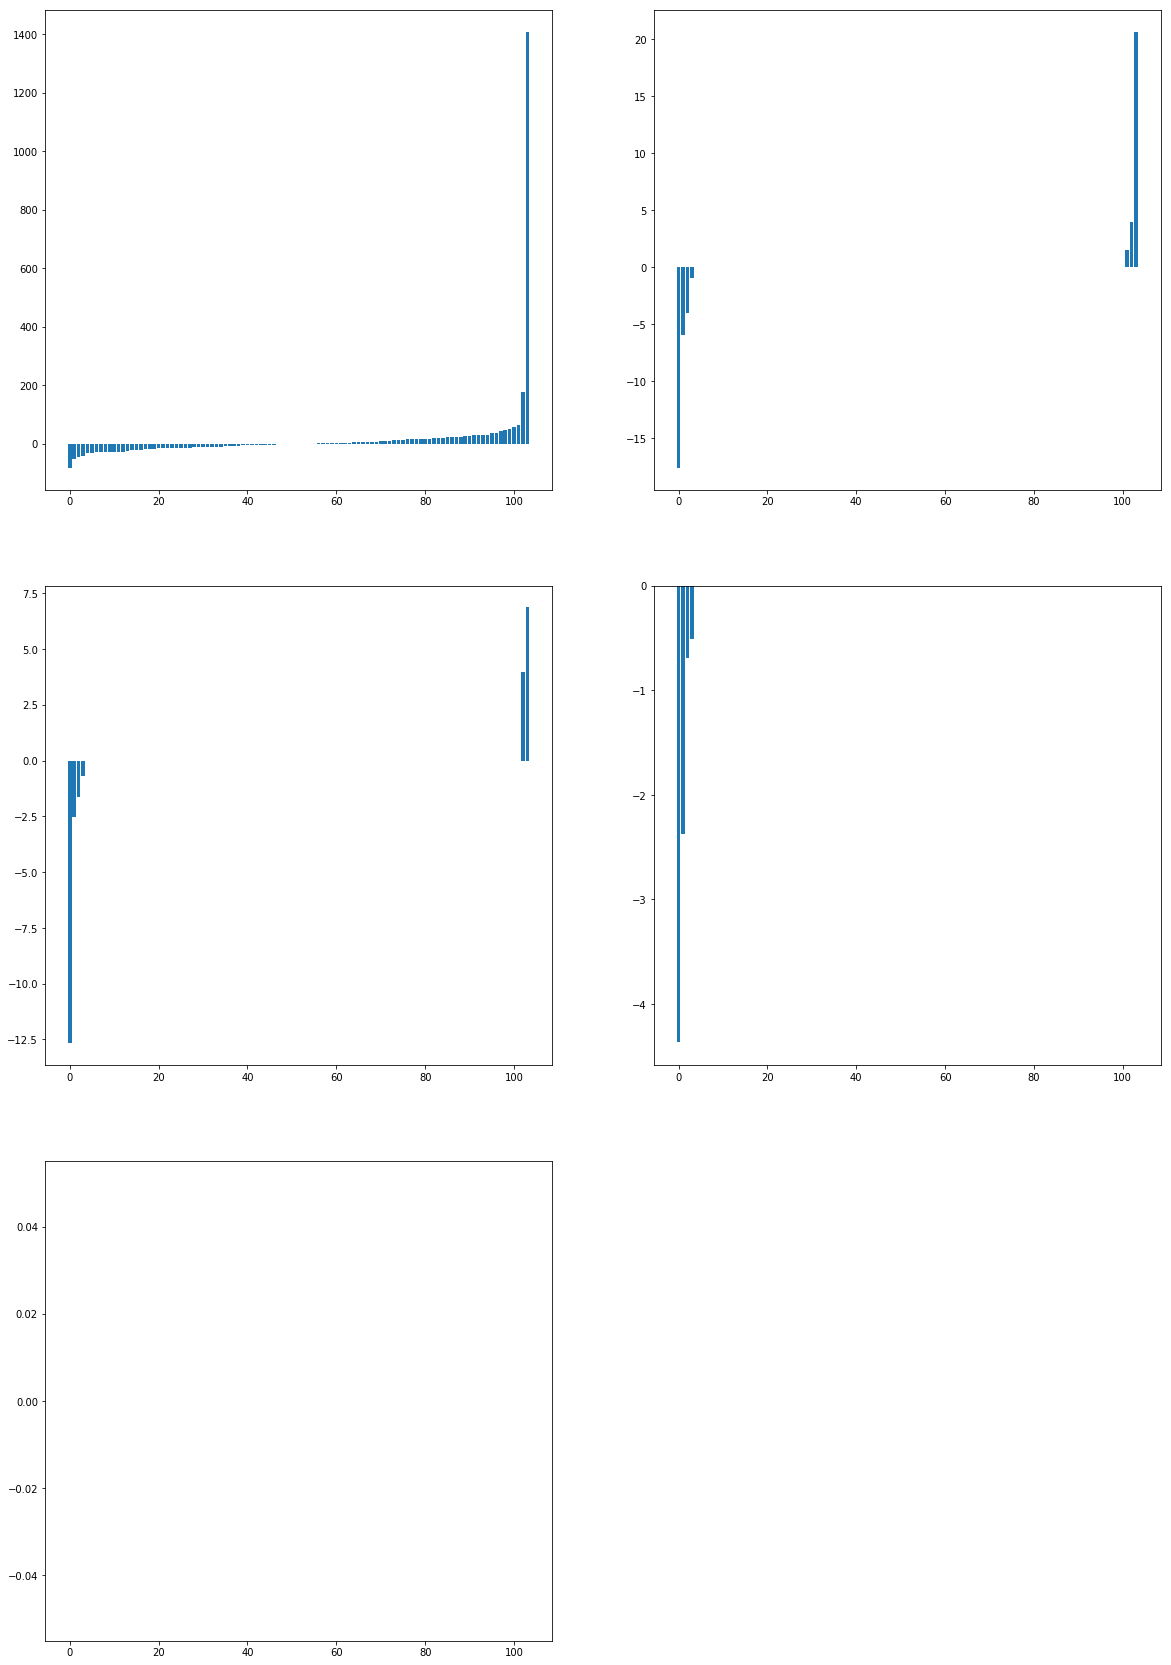

In [932]:
n = np.arange(len(lm.coef_))

plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
plt.bar(n, np.sort(lm.coef_, axis=0))

plt.subplot(3,2,2)
plt.bar(n, np.sort(lm1.coef_, axis=0))

plt.subplot(3,2,3)
plt.bar(n, np.sort(lm2.coef_, axis=0))

plt.subplot(3,2,4)
plt.bar(n, np.sort(lm3.coef_, axis=0))

plt.subplot(3,2,5)
plt.bar(n, np.sort(lm4.coef_, axis=0))
plt.show()

In [933]:
lm6.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,
       -0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
       -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.])

In [842]:
_list = []
for x in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=x)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    _list.append((abs(lm.score(X_train, y_train) - lm.score(X_test, y_test)), x))



In [843]:
_list

[(0.3331382382534046, 0),
 (0.01478029015290061, 1),
 (0.033228956148724786, 2),
 (0.07049759812203338, 3),
 (0.09560605475778361, 4),
 (0.06206250958523918, 5),
 (0.30133439587771416, 6),
 (0.31578747159858045, 7),
 (0.08792445140745375, 8),
 (0.057948367317298466, 9),
 (0.056925667537315094, 10),
 (0.139994010124611, 11),
 (0.12860870139434577, 12),
 (0.08938436240001568, 13),
 (0.19090361201127493, 14),
 (0.06723936454673307, 15),
 (0.14388613037135545, 16),
 (0.13044390855808696, 17),
 (0.1420332685936896, 18),
 (0.13981945082849978, 19),
 (0.2677587624578325, 20),
 (0.1128266494869461, 21),
 (0.230122581262711, 22),
 (0.2197886828169604, 23),
 (0.28282869309758574, 24),
 (0.08478956523599601, 25),
 (0.1689315497857371, 26),
 (0.10663737797750883, 27),
 (0.18787262055922882, 28),
 (0.1354754110579115, 29),
 (0.12570659453643618, 30),
 (0.06872704310250466, 31),
 (0.037324270180780994, 32),
 (0.06225102223223211, 33),
 (0.046319938312373354, 34),
 (0.1098431339305902, 35),
 (0.12783